In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from flask import Flask

In [ ]:
# determining root path
#app = Flask(__name__)

In [ ]:
# routing function to root page
#@app.route('/')
#def index():
#    return 'this is the homepage'

In [ ]:
#if __name__ == "__main__":
#    app.run(debug = False)

In [3]:
# https://data.milwaukee.gov/dataset/wibr/resource/87843297-a6fa-46d4-ba5d-cb342fb2d3bb
data = pd.read_csv('data.csv')

In [4]:
tmp = data[data['ReportedDateTime'] > "2014-00-00 00:00:00"]

In [14]:
#data['ReportedDateTime']
tmp.describe()

,IncidentNum,ALD,NSP,POLICE,TRACT,WARD,ZIP,RoughX,RoughY,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft
count,2.134740e+05,210459.000000,128199.000000,210459.000000,210459.000000,210459.000000,210459.000000,2.104590e+05,210459.000000,213474.000000,213474.000000,213474.000000,213474.000000,213474.000000,213474.000000,213474.000000,213474.000000,213474.000000,213474.000000
mean,1.631422e+08,7.593018,8.881606,4.217073,25711.656646,143.674863,53212.246062,2.546790e+06,394329.227777,0.007209,0.271223,0.136921,0.099918,0.002825,0.100972,0.078736,0.022715,0.167922,0.150046
std,2.180572e+07,4.469272,5.587116,1.955831,60750.853606,84.796524,164.203030,1.063164e+04,17319.805113,0.084601,0.444592,0.343764,0.299892,0.053073,0.301293,0.269326,0.148993,0.373798,0.357118
min,1.814002e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.516466e+06,342612.886000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.511700e+08,4.000000,4.000000,3.000000,3500.000000,69.000000,53207.000000,2.539707e+06,381701.031000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.621301e+08,7.000000,7.000000,4.000000,7900.000000,144.000000,53212.000000,2.548267e+06,395557.731000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.731900e+08,12.000000,15.000000,6.000000,16800.000000,215.000000,53218.000000,2.554707e+06,405796.483000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.914600e+09,15.000000,19.000000,7.000000,980000.000000,325.000000,53295.000000,2.572051e+06,440857.993000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.describe()

In [15]:
data.head()

,IncidentNum,ReportedDateTime,Location,WeaponUsed,ALD,NSP,POLICE,TRACT,WARD,ZIP,...,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft
0,191790038,2019-06-28 03:34:00,3255 N 89TH ST,NaN,5.0,NaN,7.0,5400.0,84.0,53222.0,...,0,0,0,0,0,0,0,0,0,1
1,191790027,2019-06-28 02:14:00,9002 W FAIRMOUNT AV,NaN,5.0,NaN,7.0,1700.0,36.0,53225.0,...,0,0,0,0,0,0,0,0,0,1
2,191790023,2019-06-28 02:01:00,4550 N 41ST ST,NONE,7.0,1.0,7.0,2600.0,64.0,53209.0,...,0,1,0,0,0,0,0,0,0,0
3,191790015,2019-06-28 01:20:00,9236 W BROWN DEER RD,PERSONAL WEAPON,9.0,NaN,4.0,201.0,2.0,53224.0,...,0,1,0,0,0,0,0,0,0,0
4,191790022,2019-06-28 00:00:00,2235 W MANGOLD AV,PERSONAL WEAPON,13.0,NaN,6.0,21700.0,315.0,53221.0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
# Getting total number of incidents by crime
Arson = tmp.groupby('Arson').count()['IncidentNum'][1]
Assaults = tmp.groupby('AssaultOffense').count()['IncidentNum'][1]
Burglary = tmp.groupby('Burglary').count()['IncidentNum'][1]
Damage = tmp.groupby('CriminalDamage').count()['IncidentNum'][1]
Homicide = tmp.groupby('Homicide').count()['IncidentNum'][1]
LockedVehicle = tmp.groupby('LockedVehicle').count()['IncidentNum'][1]
Robbery = tmp.groupby('Robbery').count()['IncidentNum'][1]
SexOffense = tmp.groupby('SexOffense').count()['IncidentNum'][1]
Theft = tmp.groupby('Theft').count()['IncidentNum'][1]
VehicleTheft = tmp.groupby('VehicleTheft').count()['IncidentNum'][1]

In [21]:
#sns.set_style("darkgrid")
#sns.axes_style("darkgrid")

In [29]:
# temporary dataframe to display counts
temp = pd.DataFrame({'Type of Crime' : ['Arson', 'AssaultOffense', 'Burglary', 'CriminalDamage', 'Homicide',
                                       'LockedVehicle', 'Robbery', 'SexOffense', 'Theft', 'VehicleTheft'], 
                    'Number of Incidents' : [Arson, Assaults, Burglary, Damage, Homicide, LockedVehicle, Robbery, SexOffense, 
                               Theft, VehicleTheft]})

In [69]:
# sorting by greatest counts
temp = temp.sort_values(['Number of Incidents']).reset_index(drop = True)

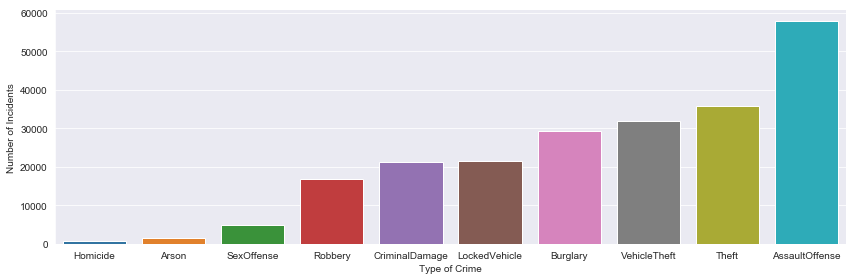

In [70]:
# Displaying barplot of crimes
sns.catplot(data = temp, x = "Type of Crime", y = "Number of Incidents", height = 4, kind ="bar", aspect = 3)